In [1]:
#Import required libs here
import numpy as np
import pandas as pd 

In [2]:
# Read all input Files stored on hard drive
dataset = pd.read_csv("D:/Suyog's Docs/Data/BankCustomerSegmentation/new_train.csv")
dataset.head(20)
                           

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,no
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,574,1,999,0,nonexistent,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,no


In [3]:
dataset.info()
# IN the dataset there are the columns job, material, eductaion, default, housing, contact  which are categorical. 
#we need to get  the unique values for each columns.
dataset.job.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
age            32950 non-null int64
job            32950 non-null object
marital        32950 non-null object
education      32950 non-null object
default        32950 non-null object
housing        32950 non-null object
loan           32950 non-null object
contact        32950 non-null object
month          32950 non-null object
day_of_week    32950 non-null object
duration       32950 non-null int64
campaign       32950 non-null int64
pdays          32950 non-null int64
previous       32950 non-null int64
poutcome       32950 non-null object
y              32950 non-null object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


array(['blue-collar', 'entrepreneur', 'retired', 'admin.', 'student',
       'services', 'technician', 'self-employed', 'management',
       'unemployed', 'unknown', 'housemaid'], dtype=object)

In [4]:
# get unique values "martial" 
dataset.marital.unique()

array(['married', 'divorced', 'single', 'unknown'], dtype=object)

In [5]:
# most of the columns ahve "unknwon " which needs to replace with the null as these are missing values
dataset = dataset.replace('unknown', np.nan, regex=True)
dataset.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,NaN,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,no
8,50,blue-collar,married,basic.4y,NaN,no,no,telephone,may,fri,574,1,999,0,nonexistent,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,no


In [6]:
# let su calulate total number of rows and % of rows containing null values
percentahe_of_null_values = (dataset.isna().sum().sum()/dataset.shape[0])*100
print(" % of null values: " , percentahe_of_null_values)

 % of null values:  31.135053110773903


In [7]:
# we will drop rows having null values and then create 2 dataframes having categorical data and numerical data
dataset = dataset.dropna()
data_cat = dataset.select_dtypes(include='object').copy()
data_num =  dataset.select_dtypes(include='int64').copy()
data_cat.head(10)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
1,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,failure,no
2,retired,married,basic.4y,no,no,no,cellular,jul,mon,nonexistent,yes
3,admin.,married,university.degree,no,yes,no,telephone,may,mon,nonexistent,no
4,retired,divorced,university.degree,no,no,no,cellular,jun,tue,nonexistent,no
5,admin.,single,university.degree,no,no,no,cellular,aug,wed,nonexistent,no
6,student,single,basic.9y,no,no,no,telephone,aug,wed,nonexistent,yes
7,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,nonexistent,no
9,admin.,single,high.school,no,yes,no,cellular,jul,tue,nonexistent,no
10,services,divorced,high.school,no,yes,no,cellular,jul,mon,nonexistent,no
11,technician,married,university.degree,no,yes,no,telephone,may,fri,nonexistent,no


In [8]:
#plot historgram for each column to check how the balance the input data and target variable is
import matplotlib.pyplot as plt
import seaborn as sns
 # Setting seaborn as default style even if use only matplotlib
sns.set()
#fig, ax = plt.subplots(1,2)

fig, axes = plt.subplots(4, 2, figsize=(15,25), sharey=True)
fig.suptitle('Frequecny plot for Categorical data')


plt.xticks(rotation=45)
plt.ylabel("Frequency")
#get frequncy of job
ax0  =sns.countplot(ax=axes[0,0],x="job", data=data_cat)
ax0.tick_params(labelrotation=45)
# get frequncy of martial status
sns.countplot(ax=axes[0,1],x='marital',data=data_cat)
#get frequency of education
ax2 = sns.countplot(ax=axes[1,0],x="education", data=data_cat)
ax2.tick_params(labelrotation=45)
# get frequency of dafault
ax3 = sns.countplot(ax=axes[1,1],x="default", data=data_cat)
ax3.tick_params(labelrotation=45)
# get frequency of housing
ax4 = sns.countplot(ax=axes[2,0],x="loan", data=data_cat)
ax4.tick_params(labelrotation=45)
# get the frequency of contact 
sns.countplot(ax=axes[2,1],x="contact", data=data_cat)
# get the frequecny of y( target variable)
sns.countplot(ax=axes[3,0],x="y", data=data_cat)
# get the frequecny of previous outcome
sns.countplot(ax=axes[3,1],x='poutcome', data= data_cat)



In [9]:
#understand correlation between the numerical variable and on target variable
target_var = dataset[['y']].replace(['no', 'yes'],[0, 1])
#drop categorical variable for ploting Kendall Rank correlation coeffiencient
#corr_data = target_var.drop
#add the target varible to the numeric datafarme to understand the impact
#frames = [target_var, data_num]
#corr_data = pd.concat(frames)
#corr_data.head(100)

In [10]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [11]:
target_var = encode_and_bind(dataset,'y')
corr_data = target_var.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y','y_no'], axis = 1)
corr_data.head()

,age,duration,campaign,pdays,previous,y_yes
1,37,202,2,999,1,0
2,78,1148,1,999,0,1
3,36,120,2,999,0,0
4,59,368,2,999,0,0
5,29,256,2,999,0,0


In [12]:
corr = corr_data.corr(method='kendall')

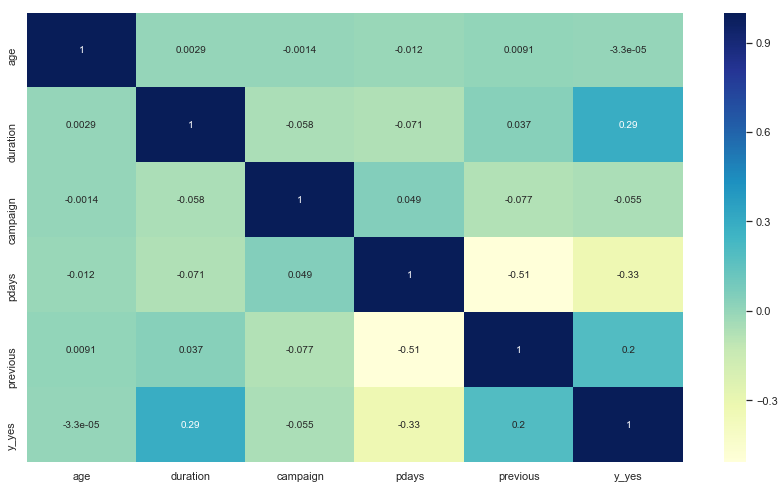

In [13]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
from scipy.stats.stats import kendalltau
rcParams['figure.figsize'] = 14.7,8.27
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="YlGnBu", annot=True)

In [14]:
data_cat['education']

1          university.degree
2                   basic.4y
3          university.degree
4          university.degree
5          university.degree
6                   basic.9y
7                   basic.4y
9                high.school
10               high.school
11         university.degree
12       professional.course
13         university.degree
14                  basic.9y
15                  basic.9y
16         university.degree
18                  basic.4y
19         university.degree
21                  basic.4y
22                  basic.6y
24         university.degree
25                  basic.4y
26               high.school
27               high.school
29       professional.course
30               high.school
31                  basic.4y
32         university.degree
33       professional.course
35         university.degree
36         university.degree
                ...         
32911               basic.9y
32912            high.school
32913            high.school
32914      uni

In [15]:
# All variable are have weak coeffient so there is no multicolinearity between the variables.
# retianing all variables frm above plots, we can merge housemaid, unemployed, studnet categories into one 
dataset['job_new']=np.where(dataset['job'] =='student', 'unemployed', dataset['job'])
dataset['job_new']=np.where(dataset['job_new'] =='housemaid', 'unemployed', dataset['job_new'])
dataset['job_new']=np.where(dataset['job_new'] =='entrepreneur', 'self-employed', dataset['job_new'])
dataset['job_new'].value_counts()
dataset['education_new'] = np.where(dataset['education'] == 'illiterate', 'basic.4y',  dataset['education'])
dataset['education_new'] = np.where(dataset['education_new'] == 'basic.4y', 'basic.6y', dataset['education_new'])
dataset['education_new'] = np.where(dataset['education_new'] == 'basic.6y', 'basic.9y', dataset['education_new'])
dataset['education_new'].value_counts()


#education_order = ['basic.9y', 'high.school', 'professional.course', 'university.degree']
#month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
#day_of_week_order = [ 'mon','tue', 'wed', 'thu', 'fri']
#job_new_order= ['self-employed', 'retired', 'admin.', 'unemployed', 'blue-collar','services', 'technician', 'management']
#dafault_order = ['no', 'yes']
#housing_order= ['no', 'yes']
#loan_order = ['no', 'yes']
#poutcome_order = ['failure', 'nonexistent','success']
#def ordered_labels(df, col, order):
#    df[col] = df[col].astype('category')
#    df[col] = df[col].cat.reorder_categories(order, ordered=True)
#    df[col] = df[col].cat.codes.astype(int)
#ordered_labels(dataset, 'education_new', education_order)
#ordered_labels(dataset, 'month', month_order)
#ordered_labels(dataset, 'day_of_week', day_of_week_order)
#ordered_labels(dataset, 'job_new', job_new_order)
#ordered_labels(dataset,'default', dafault_order )
#ordered_labels(dataset,'housing',housing_order)
#ordered_labels(dataset,'loan',loan_order)
#ordered_labels(dataset,'poutcome',poutcome_order)

university.degree      8319
basic.9y               6409
high.school            6127
professional.course    3450
Name: education_new, dtype: int64

In [16]:
#data_cat.day_of_week.unique()


In [17]:
dataset.head(20)
#convert all catgories to numericalset to do hot encoding
#dataset.job_new.unique()

#drop job, education coloumns as we have merged above mentioend categories , also drop contact coloumn. 
#convert martial into numerical category and target variable y as well


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,job_new,education_new
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no,self-employed,university.degree
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes,retired,basic.9y
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no,admin.,university.degree
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no,retired,university.degree
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no,admin.,university.degree
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,yes,unemployed,basic.9y
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,no,blue-collar,basic.9y
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,no,admin.,high.school
10,44,services,divorced,high.school,no,yes,no,cellular,jul,mon,158,5,999,0,nonexistent,no,services,high.school
11,32,technician,married,university.degree,no,yes,no,telephone,may,fri,93,5,999,0,nonexistent,no,technician,university.degree


In [18]:
features_data = dataset.drop(['job','education','contact'],axis=1)
features_data.head(10)
#convert maritial status, y to numbers
#y_order = ['no', 'yes']
#marital_order= ['single', 'married','divorced']
#ordered_labels(features_data,'y',y_order)
#ordered_labels(features_data, 'marital', marital_order)
features_data.head(10)


,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,job_new,education_new
1,37,married,no,no,no,nov,wed,202,2,999,1,failure,no,self-employed,university.degree
2,78,married,no,no,no,jul,mon,1148,1,999,0,nonexistent,yes,retired,basic.9y
3,36,married,no,yes,no,may,mon,120,2,999,0,nonexistent,no,admin.,university.degree
4,59,divorced,no,no,no,jun,tue,368,2,999,0,nonexistent,no,retired,university.degree
5,29,single,no,no,no,aug,wed,256,2,999,0,nonexistent,no,admin.,university.degree
6,26,single,no,no,no,aug,wed,449,1,999,0,nonexistent,yes,unemployed,basic.9y
7,30,married,no,yes,no,nov,wed,126,2,999,0,nonexistent,no,blue-collar,basic.9y
9,33,single,no,yes,no,jul,tue,498,5,999,0,nonexistent,no,admin.,high.school
10,44,divorced,no,yes,no,jul,mon,158,5,999,0,nonexistent,no,services,high.school
11,32,married,no,yes,no,may,fri,93,5,999,0,nonexistent,no,technician,university.degree


In [19]:
#let us do hot encoding on categoricla coloumn and drop the original cols
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
features_data['marital'] = labelencoder.fit_transform(features_data['marital'])
features_data.head(5)

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,job_new,education_new
1,37,1,no,no,no,nov,wed,202,2,999,1,failure,no,self-employed,university.degree
2,78,1,no,no,no,jul,mon,1148,1,999,0,nonexistent,yes,retired,basic.9y
3,36,1,no,yes,no,may,mon,120,2,999,0,nonexistent,no,admin.,university.degree
4,59,0,no,no,no,jun,tue,368,2,999,0,nonexistent,no,retired,university.degree
5,29,2,no,no,no,aug,wed,256,2,999,0,nonexistent,no,admin.,university.degree


In [20]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [21]:
features_to_encode = ['marital', 'default', 'housing', 'loan', 'month', 'day_of_week', 'previous','job_new', 'education_new', 'poutcome', 'y']
res = features_data
for feature in features_to_encode:
    res = encode_and_bind(res, feature)
res.head(15)
print(res.columns.tolist())

['age', 'duration', 'campaign', 'pdays', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'job_new_admin.', 'job_new_blue-collar', 'job_new_management', 'job_new_retired', 'job_new_self-employed', 'job_new_services', 'job_new_technician', 'job_new_unemployed', 'education_new_basic.9y', 'education_new_high.school', 'education_new_professional.course', 'education_new_university.degree', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'y_no', 'y_yes']


In [22]:
features = res.drop(['default_no', 'housing_no', 'loan_no','y_no'],axis=1)
features.head()

,age,duration,campaign,pdays,default_yes,housing_yes,loan_yes,month_apr,month_aug,month_dec,...,job_new_technician,job_new_unemployed,education_new_basic.9y,education_new_high.school,education_new_professional.course,education_new_university.degree,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
1,37,202,2,999,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,78,1148,1,999,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,36,120,2,999,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,59,368,2,999,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5,29,256,2,999,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [23]:
features_to_normalize = ['age', 'duration', 'campaign', 'pdays']
# could be ['A','B'] 

features[features_to_normalize] = features[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [25]:
#Save the features for running the logistic regression
features.to_csv("D:/Suyog's Docs/Data/BankCustomerSegmentation/features2.csv")